# Problem 

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

You as an analyst have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.

In [2]:
#Import important libraries

import pandas as pd #For Data Manipulation
import numpy as np #For mathematical operations
import seaborn as sns #Visulaization library
import matplotlib.pyplot as plt #Basic Visualization library
import os #Library to make use of underlying OS

import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the data
df1=pd.read_csv(r'C:/Users/z0126520/Documents/Python/GL/Week8_project/Project_1_autmotive/austo_automobile+(2)+(1).csv')

## A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [4]:
#shape of the Data
print('No of Customers in the Data set =', df1.shape[0])
print('No of Variables/features of those customers in the Data set =', df1.shape[1])


No of Customers in the Data set = 1581
No of Variables/features of those customers in the Data set = 14


In [5]:
#nature of variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
Age                 1581 non-null int64
Gender              1528 non-null object
Profession          1581 non-null object
Marital_status      1581 non-null object
Education           1581 non-null object
No_of_Dependents    1581 non-null int64
Personal_loan       1581 non-null object
House_loan          1581 non-null object
Partner_working     1581 non-null object
Salary              1581 non-null int64
Partner_salary      1475 non-null float64
Total_salary        1581 non-null int64
Price               1581 non-null int64
Make                1581 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [6]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581,NaN,NaN,NaN,31.9222,8.42598,22,25,29,38,54
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581,NaN,NaN,NaN,2.45794,0.943483,0,2,2,3,4
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581,NaN,NaN,NaN,60392.2,14674.8,30000,51900,59500,71800,99300


## B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data?

In [7]:
print('Total number of missing values in the data set are',df1.isnull().sum().sum())

Total number of missing values in the data set are 159


In [8]:
df1.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [9]:
#check the discrepencies in each variable
print('Unique values in Age',df1['Age'].unique())
print('Unique values in Profession',df1['Profession'].unique())
print('Unique values in Marital_status',df1['Marital_status'].unique())
print('Unique values in Education',df1['Education'].unique())
print('Unique values in No_of_Dependents',df1['No_of_Dependents'].unique())
print('Unique values in Personal_loan',df1['Personal_loan'].unique())
print('Unique values in House_loan',df1['House_loan'].unique())
print('Unique values in Partner_working',df1['Partner_working'].unique())
print('Unique values in Salary',df1['Salary'].unique())


Unique values in Age [53 52 50 49 47 46 45 51 54 48 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22]
Unique values in Profession ['Business' 'Salaried']
Unique values in Marital_status ['Married' 'Single']
Unique values in Education ['Post Graduate' 'Graduate']
Unique values in No_of_Dependents [4 3 2 1 0]
Unique values in Personal_loan ['No' 'Yes']
Unique values in House_loan ['No' 'Yes']
Unique values in Partner_working ['Yes' 'No']
Unique values in Salary [99300 95500 97300 72500 79700 79800 80900 79100 89400 83700 81600 81300
 77400 77600 74100 87600 86800 95100 92600 98400 72700 84600 88000 85400
 78000 87900 81900 88500 87700 98300 94900 91100 74500 81700 84700 82200
 79600 77700 72100 96600 72800 73500 90000 87100 90300 72200 78300 90200
 79500 73400 90600 93900 80600 85100 82300 79200 70600 79300 72000 88200
 81000 78400 75400 91000 89700 78800 89800 89900 88700 88900 83300 79000
 77500 76800 71700 89500 77000 86000 86900 85900 79900 74800 98600 76100
 827

In [10]:
print('Unique values in Partner_salary',df1['Partner_salary'].unique())
print('Unique values in Total_salary',df1['Total_salary'].unique())
print('Unique values in Make',df1['Make'].unique())

Unique values in Partner_salary [70700. 70300. 60700. 60200. 60500. 50800. 40400.     0. 70600. 60600.
 60300. 45500. 40200. 40700.   600.   700. 27800. 70000. 40100. 40900.
 27000.    nan 40500. 50400. 80400. 60900. 60100. 70200. 30000. 40300.
 40800. 70800.   900. 45000. 40600. 50700. 80500. 27700. 35800. 26600.
 60000. 27900. 60800. 40000. 70100. 38100. 38200. 30200. 38500. 50900.
 35100. 38700. 38300. 38900. 23200. 24700. 30800. 28100. 38400. 38000.
 23100. 30100. 25700. 70400.   200. 30900. 26100. 45700.   400. 28200.
 70900. 38800. 45200. 26800. 60400. 30300. 25800.   800. 38600. 24500.
 30700. 28500. 24900. 70500. 35900. 30500. 28900. 27200. 45900. 25300.
 35600. 25000. 25200. 26300. 35700. 23800. 32700. 30600. 45600. 28000.
 32600. 28600. 25100. 26700. 24200. 25900. 22100. 25400. 28400. 28300.
 25500. 24000. 32400. 28800. 32300. 32900. 27600. 35500. 23500. 45400.
 28700. 32800. 23700. 32500. 35300. 45800. 27300. 22900. 29800. 30400.
 35400. 24300. 29200. 24600.   100. 50300. 32

In [11]:
print('Unique values in Price',df1['Price'].unique())

Unique values in Price [61000 57000 51000 68000 67000 63000 62000 50000 66000 52000 60000 64000
 58000 54000 53000 55000 59000 56000 69000 49000 70000 65000 43000 47000
 37000 35000 42000 33000 34000 40000 36000 41000 48000 44000 31000 32000
 39000 45000 46000 38000 30000 25000 22000 28000 29000 23000 21000 20000
 24000 19000 18000 26000 27000]


In [12]:
print('Unique values in Gender',df1['Gender'].unique())

Unique values in Gender ['Male' 'Femal' 'Female' nan 'Femle']


In [13]:
df1.nunique()

Age                  33
Gender                4
Profession            2
Marital_status        2
Education             2
No_of_Dependents      5
Personal_loan         2
House_loan            2
Partner_working       2
Salary              538
Partner_salary      149
Total_salary        754
Price                53
Make                  3
dtype: int64

In [14]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

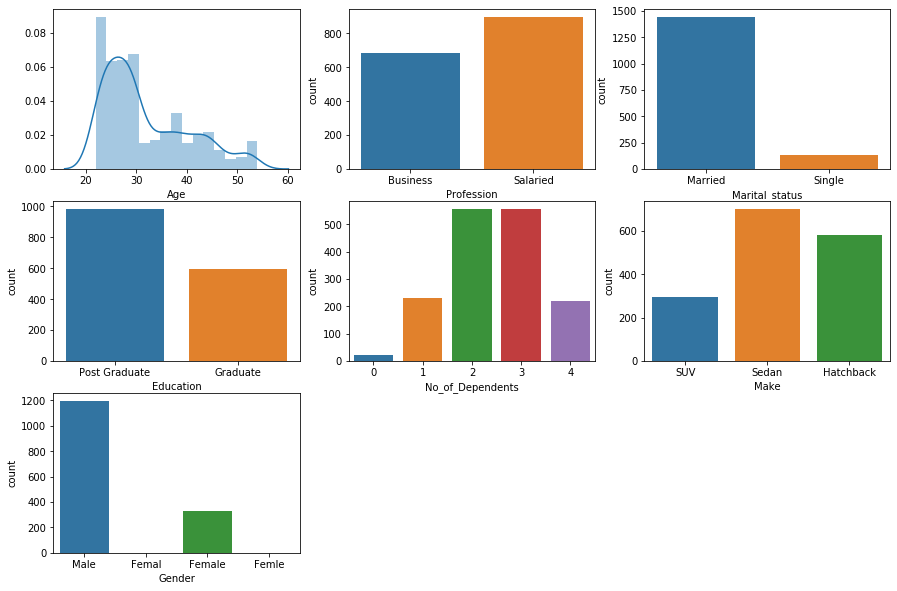

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(331)
sns.distplot(df1['Age'],kde=True)
plt.subplot(332)
sns.countplot(df1['Profession'])
plt.subplot(333)
sns.countplot(df1['Marital_status'])
plt.subplot(334)
sns.countplot(df1['Education'])
plt.subplot(335)
sns.countplot(df1['No_of_Dependents'])
plt.subplot(336)
sns.countplot(df1['Make'])
plt.subplot(337)
sns.countplot(df1['Gender'])

In [16]:
df1['Gender'].replace('Femal','Female',inplace=True)

In [17]:
df1['Gender'].replace('Femle','Female',inplace=True)

In [18]:
df1['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [19]:
df1

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [20]:
df1['Gender'].fillna('Male',inplace=True)

In [21]:
df1['Gender'].isnull().sum()

0

In [22]:
df1.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

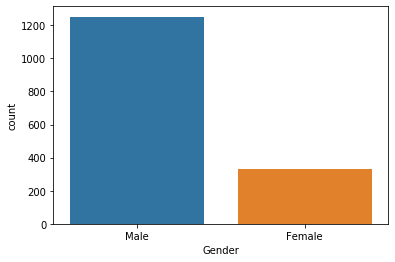

In [23]:
sns.countplot(df1['Gender']);

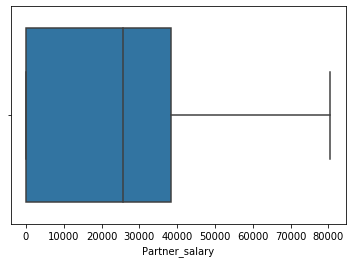

In [24]:
sns.boxplot(df1['Partner_salary'])

As there are no outliers in the partner salary, need to replace the missing values with mean of the partner salary

In [25]:
df1_mean=df1['Partner_salary'].mean()

In [26]:
#replacing missing values in Partner_salary
df1['Partner_salary'].fillna(df1_mean,inplace=True)

In [27]:
df1['Partner_salary'].isnull().sum()

0

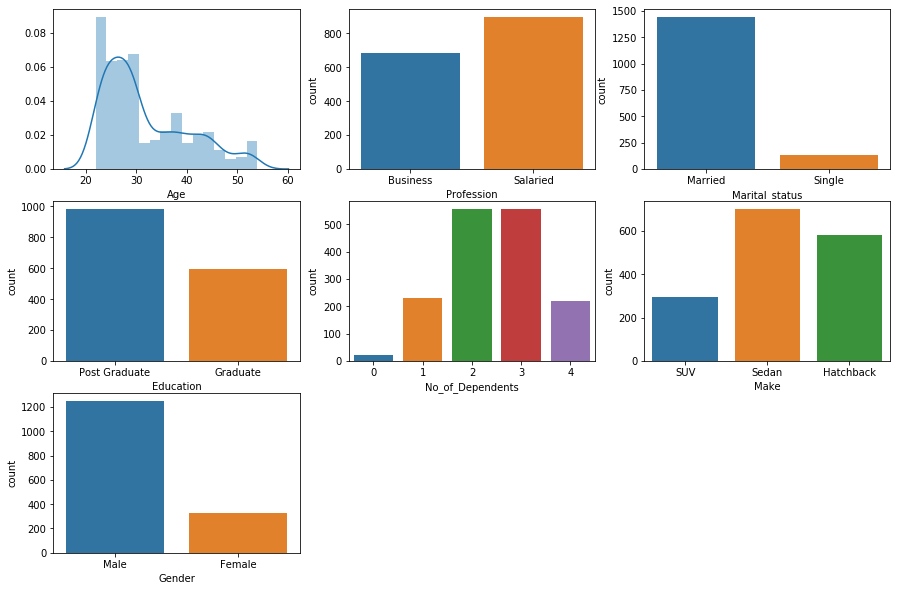

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(331)
sns.distplot(df1['Age'],kde=True)
plt.subplot(332)
sns.countplot(df1['Profession'])
plt.subplot(333)
sns.countplot(df1['Marital_status'])
plt.subplot(334)
sns.countplot(df1['Education'])
plt.subplot(335)
sns.countplot(df1['No_of_Dependents'])
plt.subplot(336)
sns.countplot(df1['Make'])
plt.subplot(337)
sns.countplot(df1['Gender'])

## D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

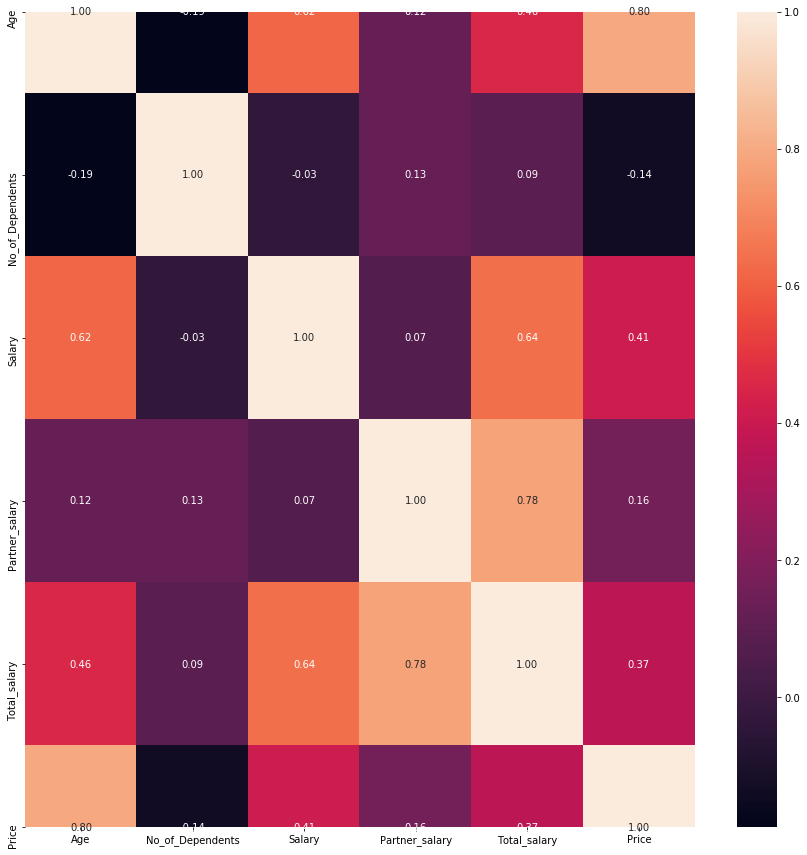

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,fmt=".2f")

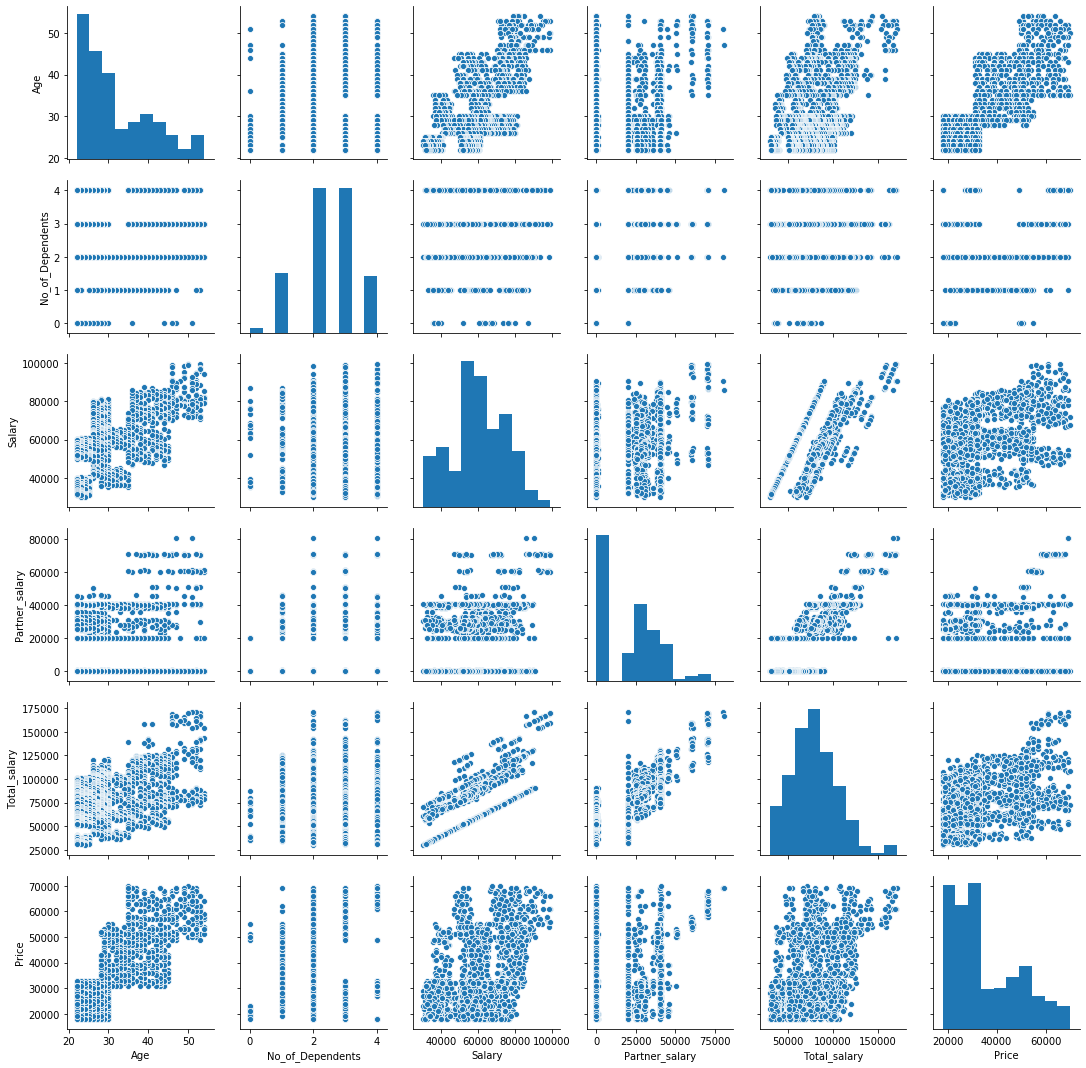

In [30]:
sns.pairplot(df1)

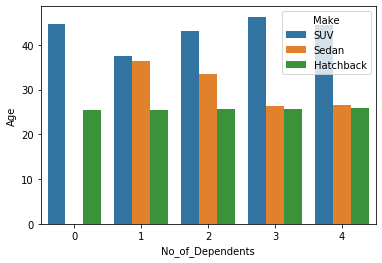

In [31]:
sns.barplot(df1['No_of_Dependents'],df1['Age'],hue=df1['Make'], ci=False)

Insights
> Elder people are buying high price car #age_vs_price
> More salary, high value car
> Customers with no dependents are not buying sedan cars

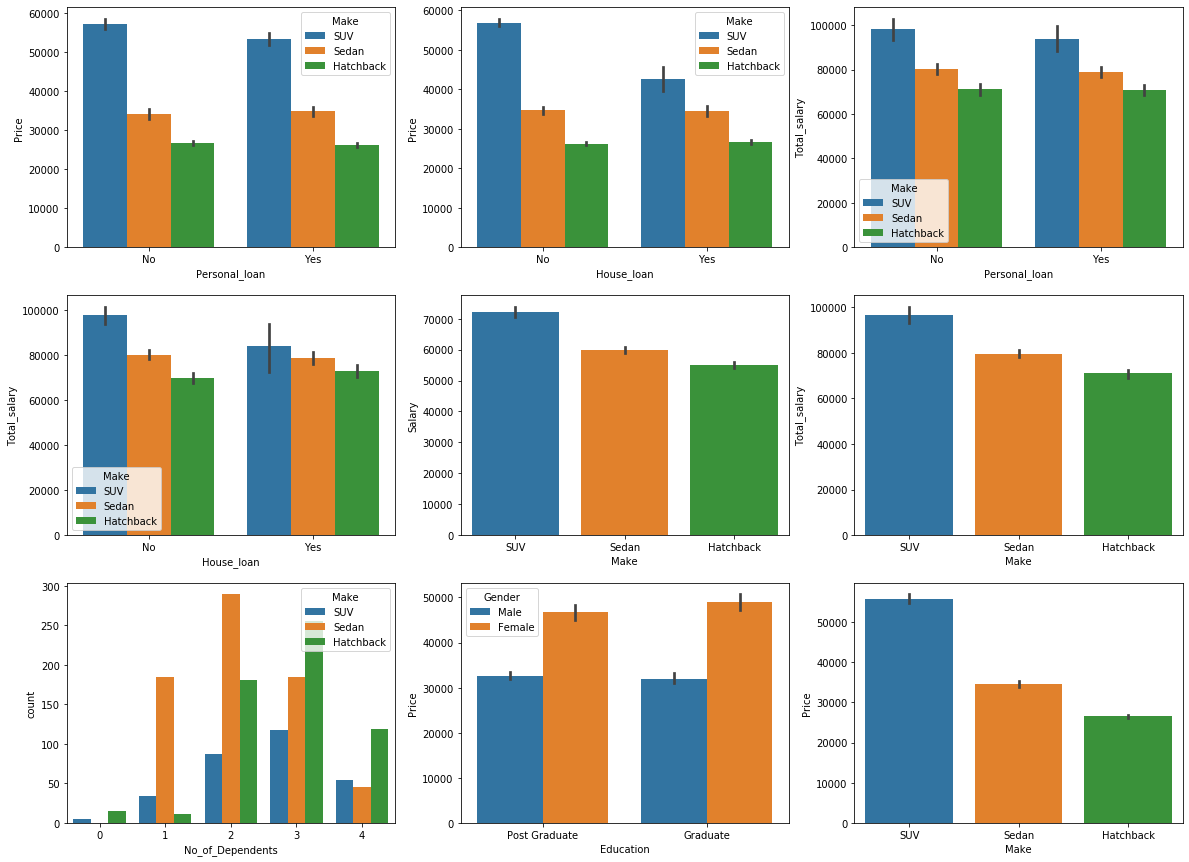

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(331)
sns.barplot(df1['Personal_loan'],df1['Price'],hue=df1['Make'])
plt.subplot(332)
sns.barplot(df1['House_loan'],df1['Price'],hue=df1['Make'])
plt.subplot(333)
sns.barplot(df1['Personal_loan'],df1['Total_salary'],hue=df1['Make'])
plt.subplot(334)
sns.barplot(df1['House_loan'],df1['Total_salary'],hue=df1['Make'])
plt.subplot(335)
sns.barplot(df1['Make'],df1['Salary'])
plt.subplot(336)
sns.barplot(df1['Make'],df1['Total_salary'])
plt.subplot(337)
sns.countplot(df1['No_of_Dependents'],hue=df1['Make'])
plt.subplot(338)
sns.barplot(df1['Education'],df1['Price'],hue=df1['Gender'])
plt.subplot(339)
sns.barplot(df1['Make'],df1['Price'])

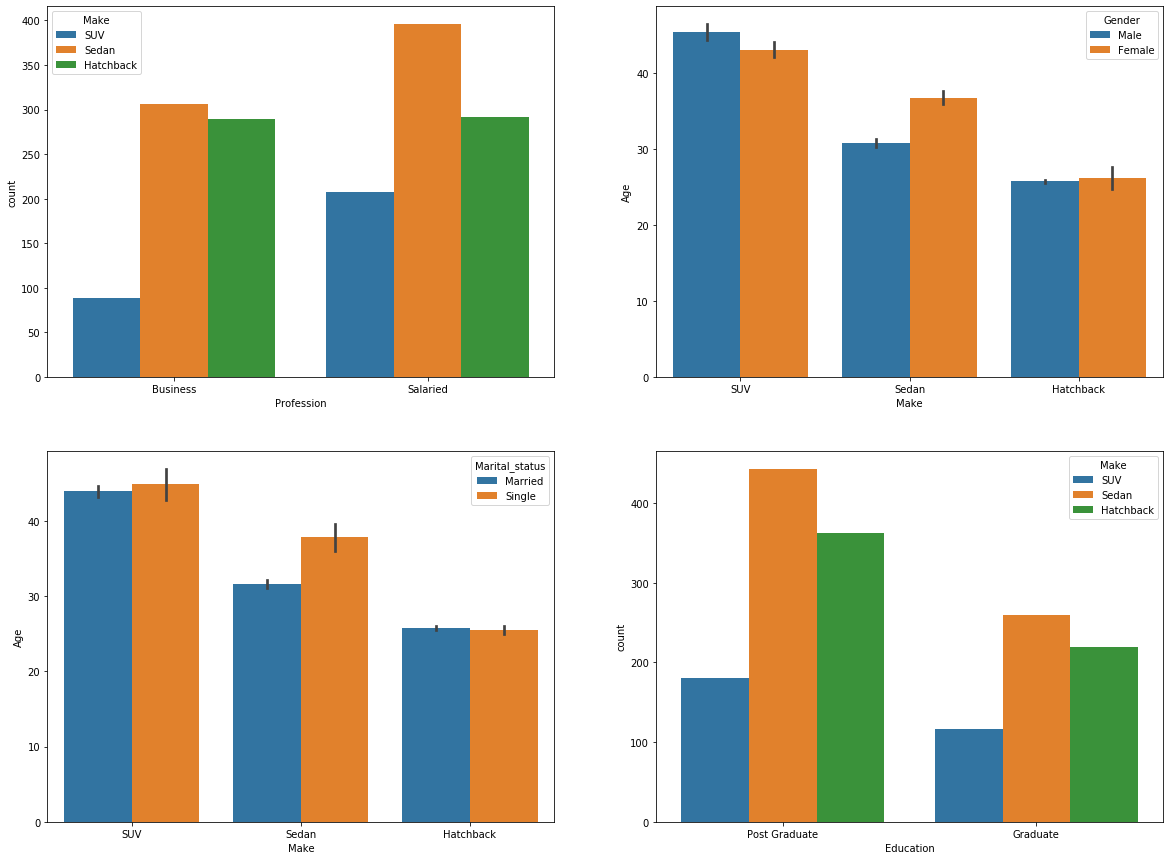

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.countplot(df1['Profession'],hue=df1['Make'])
plt.subplot(222)
sns.barplot(df1['Make'],df1['Age'],hue=df1['Gender'])
plt.subplot(223)
sns.barplot(df1['Make'],df1['Age'],hue=df1['Marital_status'])
plt.subplot(224)
sns.countplot(df1['Education'],hue=df1['Make'])

## E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [34]:
#E1
pd.crosstab(df1['Make'],df1['Gender'])

Gender,Female,Male
Make,,
Hatchback,15,567
SUV,173,124
Sedan,141,561


In [35]:
#E2
pd.crosstab(df1['Make'],df1['Profession'])

Profession,Business,Salaried
Make,,
Hatchback,290,292
SUV,89,208
Sedan,306,396


In [36]:
#E3
df1.groupby(['Make','Profession'])['Gender'].value_counts()

Make       Profession  Gender
Hatchback  Business    Male      290
           Salaried    Male      277
                       Female     15
SUV        Business    Female     55
                       Male       34
           Salaried    Female    118
                       Male       90
Sedan      Business    Male      256
                       Female     50
           Salaried    Male      305
                       Female     91
Name: Gender, dtype: int64

## F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

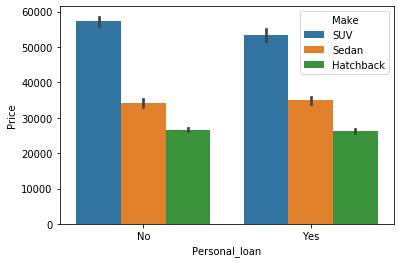

In [37]:
#F2
sns.barplot(df1['Personal_loan'],df1['Price'],hue=df1['Make']);

In [38]:
df1.groupby(['Personal_loan','Make'])['Make'].count()

Personal_loan  Make     
No             Hatchback    291
               SUV          181
               Sedan        317
Yes            Hatchback    291
               SUV          116
               Sedan        385
Name: Make, dtype: int64

On Considering both Metrics and Charts, 
1- Customers are buying more Sedan make model with Personal loans.
2- There is no difference in Hatchback cars.
3- Observed more difference in SUV models.

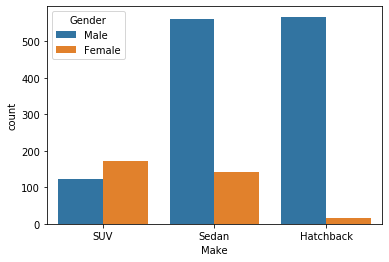

In [39]:
#F1
sns.countplot(df1['Make'],hue=df1['Gender'])

In [40]:
df1.groupby(['Gender','Make'])['Make'].count()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

## G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [70]:
#G
df1['Price'].unique()

array([61000, 57000, 51000, 68000, 67000, 63000, 62000, 50000, 66000,
       52000, 60000, 64000, 58000, 54000, 53000, 55000, 59000, 56000,
       69000, 49000, 70000, 65000, 43000, 47000, 37000, 35000, 42000,
       33000, 34000, 40000, 36000, 41000, 48000, 44000, 31000, 32000,
       39000, 45000, 46000, 38000, 30000, 25000, 22000, 28000, 29000,
       23000, 21000, 20000, 24000, 19000, 18000, 26000, 27000],
      dtype=int64)

In [61]:
df1_highprice=df1[df1['Price']>55000]
df1_highprice

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Gender_Marital_status,Personal-Home_loan,Education-Profession
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000000,170000,61000,SUV,Male-Married,No-No,Post Graduate-Business
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000000,165800,61000,SUV,Female-Married,Yes-No,Post Graduate-Salaried
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000000,158000,57000,SUV,Female-Married,No-No,Post Graduate-Salaried
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000000,142800,61000,SUV,Female-Married,Yes-No,Graduate-Salaried
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000000,139900,57000,SUV,Male-Married,No-No,Post Graduate-Salaried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,35,Male,Salaried,Married,Post Graduate,3,No,No,No,71400,0.000000,71400,63000,SUV,Male-Married,No-No,Post Graduate-Salaried
497,35,Male,Business,Married,Post Graduate,2,Yes,No,No,70900,0.000000,70900,59000,SUV,Male-Married,Yes-No,Post Graduate-Business
509,35,Male,Salaried,Married,Graduate,4,Yes,No,No,51800,20225.559322,51800,69000,SUV,Male-Married,Yes-No,Graduate-Salaried
510,35,Female,Salaried,Married,Graduate,2,Yes,No,No,50400,0.000000,50400,57000,SUV,Female-Married,Yes-No,Graduate-Salaried


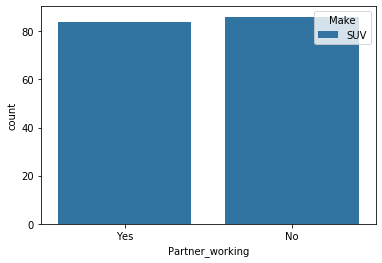

In [62]:
sns.countplot(df1_highprice['Partner_working'],hue=df1_highprice['Make']);

In [44]:
df1_highprice.groupby(['Partner_working'])['Make'].value_counts()

Partner_working  Make 
No               SUV      140
                 Sedan    133
Yes              Sedan    179
                 SUV      147
Name: Make, dtype: int64

> Partner not working had bought more cars

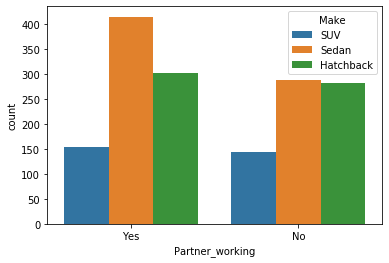

In [45]:
sns.countplot(df1['Partner_working'],hue=df1['Make']);

In [46]:
df1['Gender_Marital_status']=df1['Gender']+'-'+df1['Marital_status']

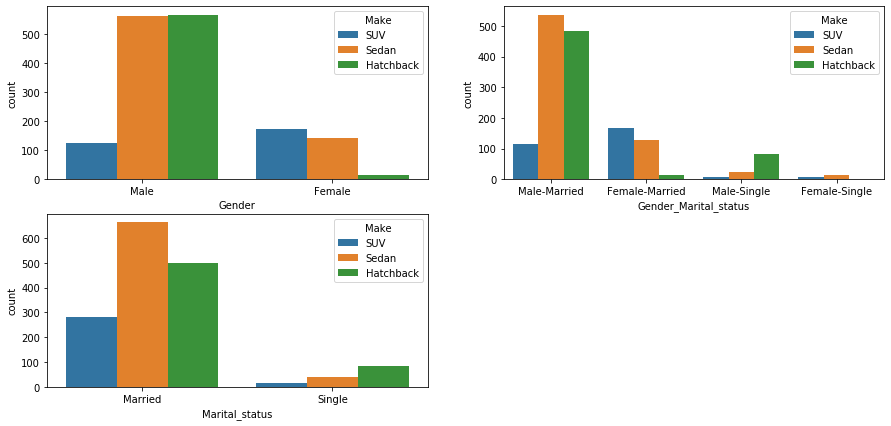

In [47]:
#H_Gender
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.countplot(df1['Gender'],hue=df1['Make'])
plt.subplot(222)
sns.countplot(df1['Gender_Marital_status'],hue=df1['Make']);
plt.subplot(223)
sns.countplot(df1['Marital_status'],hue=df1['Make']);

## H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

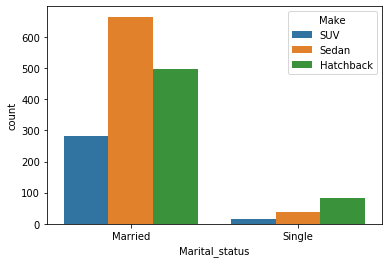

In [48]:
#H_Maritalstatus
sns.countplot(df1['Marital_status'],hue=df1['Make']);

In [49]:
df1['Gender_Marital_status']=df1['Gender']+'-'+df1['Marital_status']

In [50]:
df1['Gender_Marital_status'].unique()

array(['Male-Married', 'Female-Married', 'Male-Single', 'Female-Single'],
      dtype=object)

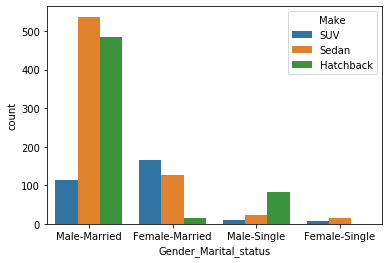

In [51]:
sns.countplot(df1['Gender_Marital_status'],hue=df1['Make']);

In [52]:
#D
df1['Personal-Home_loan']=df1['Personal_loan']+'-'+df1['House_loan']

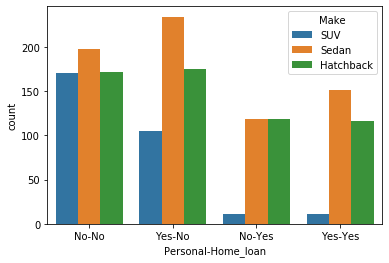

In [53]:
sns.countplot(df1['Personal-Home_loan'],hue=df1['Make']);

> With no loans there could be a possibility of seeling more SUVs.

>With loans customers will focus on low end cars, so as per graph hatch back sales can be focussed

In [54]:
df1.head(0)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Gender_Marital_status,Personal-Home_loan


In [55]:
#D
df1['Education-Profession']=df1['Education']+'-'+df1['Profession']

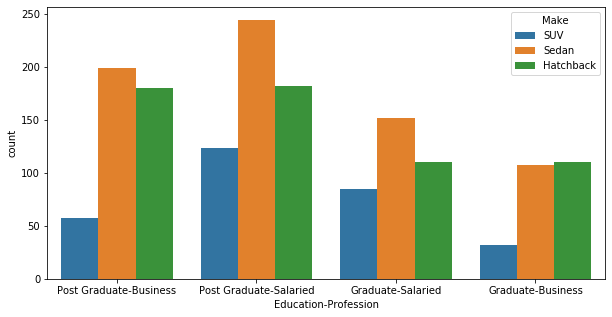

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Education-Profession'], hue=df1['Make'])

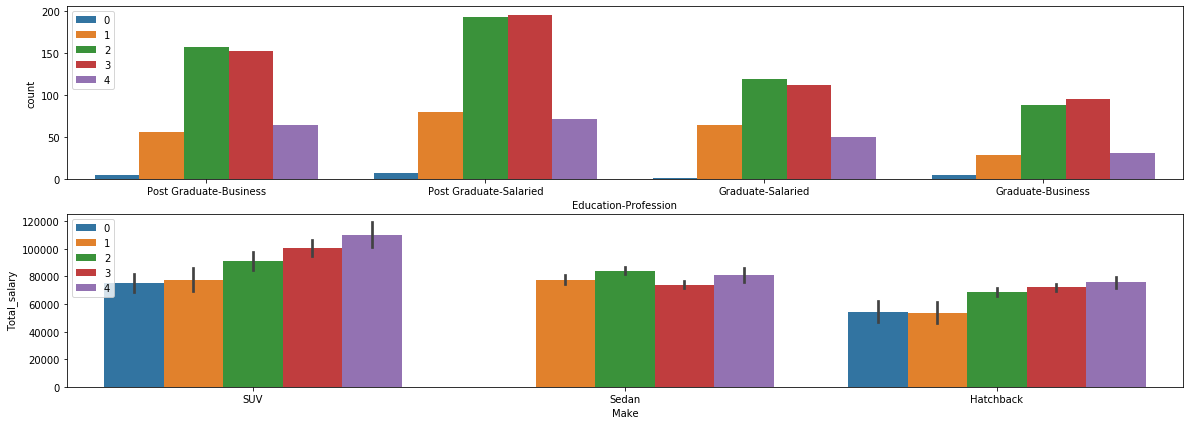

In [57]:
#D
plt.figure(figsize=(20,7))
plt.subplot(211)
sns.countplot(df1['Education-Profession'],hue=df1['No_of_Dependents']);
plt.legend(loc='upper left')
plt.subplot(212)
sns.barplot(df1['Make'],df1['Total_salary'],hue=df1['No_of_Dependents']);
plt.legend(loc='upper left')


>Customers with 4 dependents are have high range salary, however purchase count is lower end

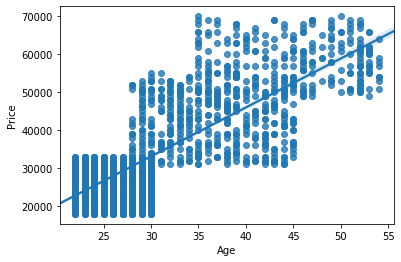

In [58]:
#D
sns.regplot(df1['Age'],df1['Price'],fit_reg=True);

In [59]:
#D
age35 = df1[df1['Age']<=30]
age3545 = df1[(df1['Age']>30)&(df1['Age']<=45)]
age45 =df1[df1['Age']>45]

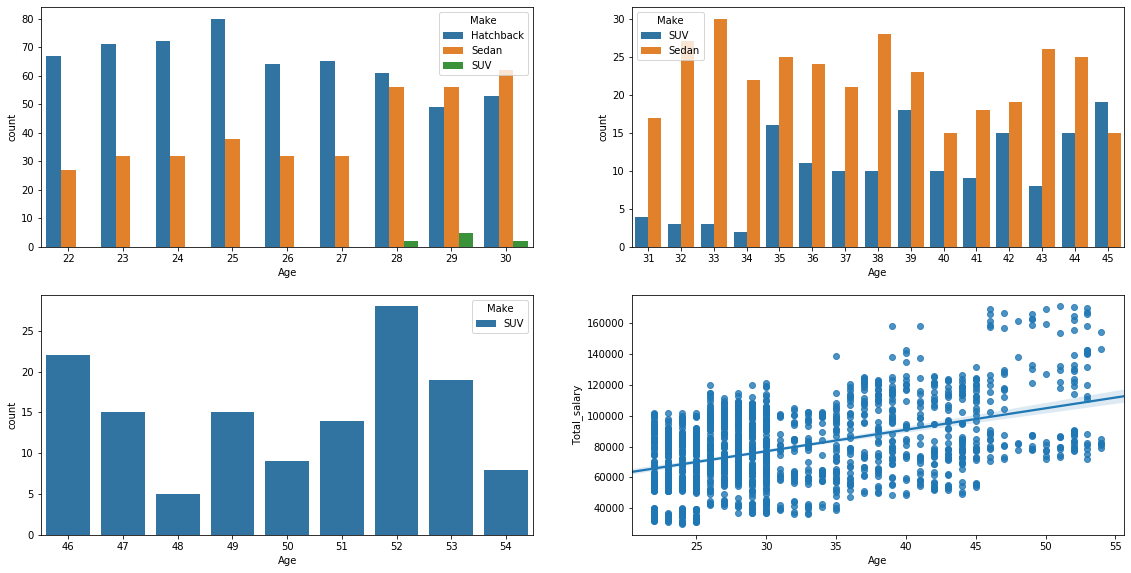

In [60]:
plt.figure(figsize=(30,15))
plt.subplot(331)
sns.countplot(age35['Age'],hue=age35['Make'])
plt.subplot(332)
sns.countplot(age3545['Age'],hue=age3545['Make'])
plt.subplot(334)
sns.countplot(age45['Age'],hue=age45['Make'])
plt.subplot(335)
sns.regplot(df1['Age'],df1['Total_salary'])